# Comparison between gradient descent, line search and conjugate gradient

In [118]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [10,8]


In [220]:
MAXIMUM_ITER = 10
STOP_THRESHOLD = 0.00001

default_X = np.array([-1,  0.3,0.2]).reshape(1,3)
default_Y = np.array([-0.1,0.5,0.5]).reshape(3,1)

default_W = np.array([1.66]).reshape(1,1)

In [218]:
def plot_w_development( res ):
    weights = res['weights']
    opacities = np.linspace(0.1,1, len(weights))
    p = plt.subplot(4,1,1)
    for i in range(len(weights)-1):

        p.scatter( weights[i], weights[i+1], alpha=opacities[i+1] )

    plt.xlabel('w_t')
    plt.ylabel('w_t+1') 
    p.set_title("Relationship between w_t and w_t+1")
    
    p = plt.subplot(4,1,2)
    p.set_title("Weight development")
    its = np.arange(0, len(weights));
    
    p.plot(its, weights)
    plt.xlabel('iteration')
    plt.ylabel('w')
    
    p = plt.subplot(4,1,3)
    p.set_title("Error development")
    p.plot( its, res['errors'] )
    plt.xlabel('iteration')
    plt.ylabel('err')
    
    p = plt.subplot(4,1,4)
    
    no_samples = 100
    X_RANGE = np.linspace(-1.5,0.5, no_samples).reshape(1,no_samples)
    predicted_values = pred(X_RANGE, res['final_weight'] )

    p.plot( X_RANGE.reshape(no_samples,1), predicted_values[:, :1].flatten() )
    p.plot( default_X.reshape(3,1), default_Y, 'ro' )
    p.set_title("Prediction boundary")
    
    plt.tight_layout()
    print("error: %.4f with %d iters" % ( res["errors"][-1], len(res["weights"])-1) )
    print("Final weight %2.4f" % res["weights"][-1])

In [207]:
def compute_err(x,y,w):
    A = pred(x,w) - Y
    return np.dot(A.T, A)[0][0] / (2*len(y))

def pred(x,w):
    return np.dot(x.T,w)


grd : stop early as no error improve
error: 0.0669 with 9 iters
Final weight 0.3105


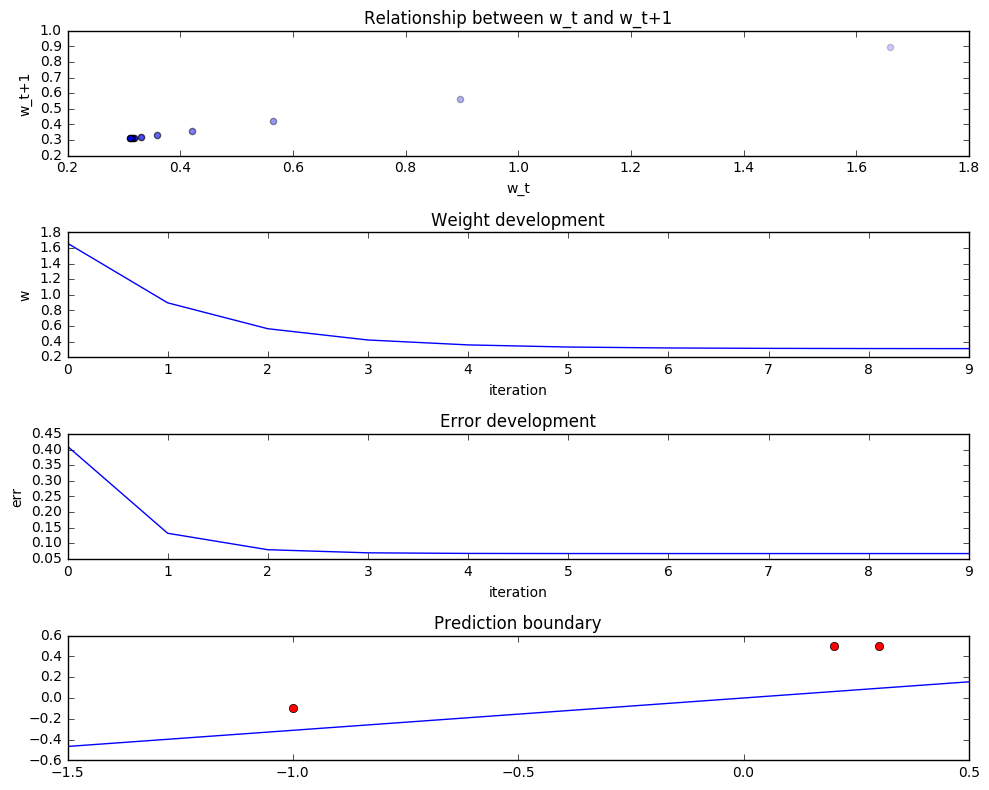

In [222]:

def grd(X,y,w, eta=0.5):
    
    it = 0
    w_basket = [w[0][0]]
    errs = [compute_err(X,y,w)]
    
    while it < MAXIMUM_ITER:
        
        H =  np.dot(X,X.T)
        grad = np.dot(H,w) - np.dot(X,Y)

        w = w - eta*grad

        w_basket.append(w[0][0])
        
        err = compute_err(X,y,w)
        errs.append(err)
        if it > 0 and errs[it-1]-err < STOP_THRESHOLD :
            print("grd : stop early as no error improve")
            break

        it = it + 1
    return {"weights": w_basket, "final_weight": w_basket[-1], "errors": errs }
grd_result = grd(default_X,default_Y,default_W)
plot_w_development(grd_result)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


error: 0.4016 with 2 iters


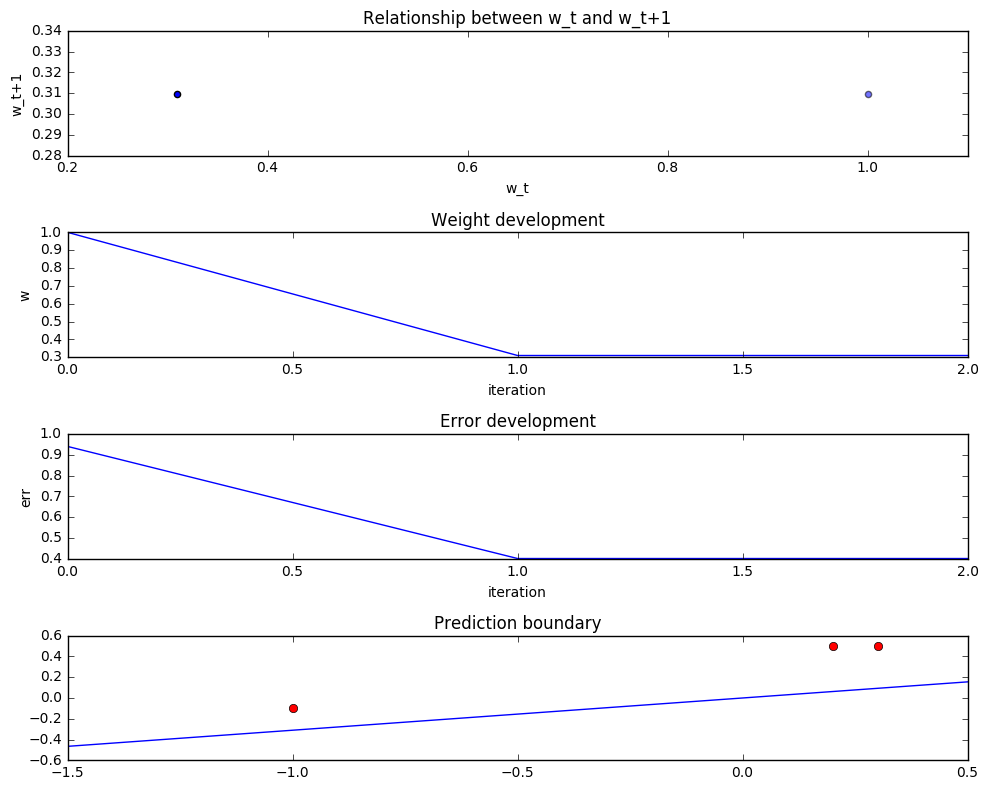

In [205]:
def line_search(X,y,w):
    it = 0
    w_basket = [w[0][0]]
    errs = [compute_err(X,y,w)]
    
    while it < MAXIMUM_ITER:
        
        H =  np.dot(X,X.T)
        grad = np.dot(H,w) - np.dot(X,Y)

        a = np.dot(grad.T, grad)[0][0]
        b = np.dot( np.dot(grad.T, H), grad )[0][0]

        eta = a/b

        if b == 0 or a == 0:
            break
        
#         eta = / np.dot( np.dot(grad.T, H), grad )[0][0]
        w = w - eta*grad

        w_basket.append(w[0][0])
        
        err = compute_err(X,y,w)
        errs.append(err)
        if it > 0 and errs[it-1]-err < STOP_THRESHOLD :
            print("line search : stop early as no error improve")
            break

        it = it + 1
    return {"weights": w_basket, "final_weight": w_basket[-1], "errors": errs }
ls_result = line_search(default_X,default_Y,default_W)
plot_w_development(ls_result)

error: 0.0669 with 1 iters


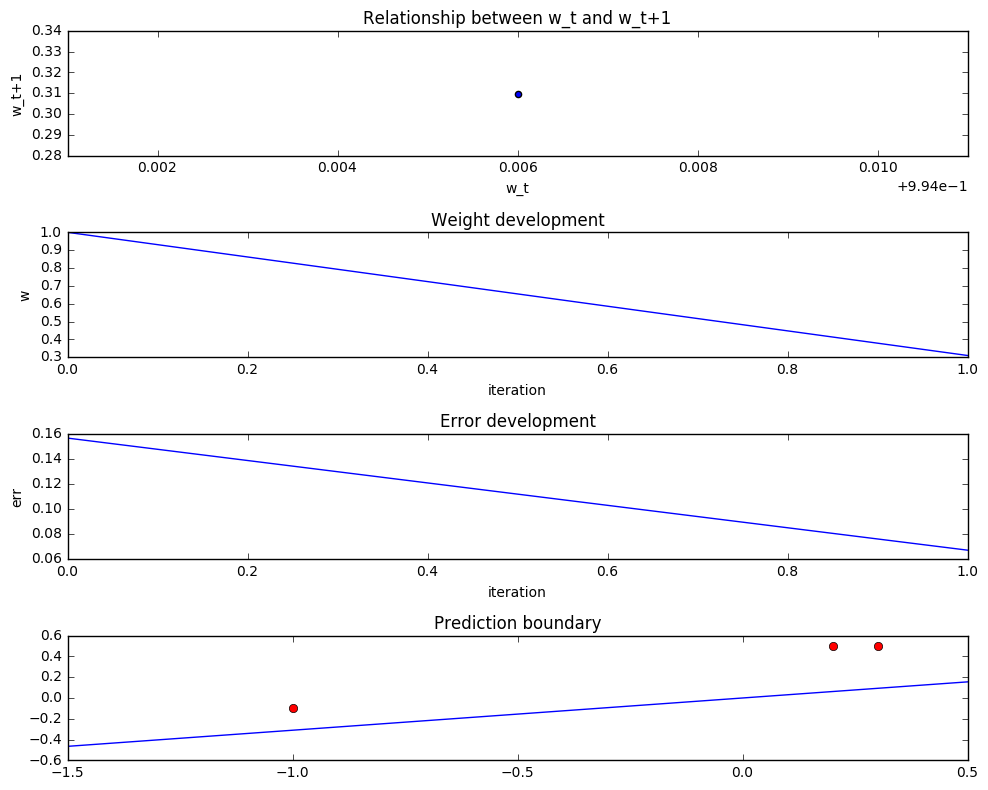

In [209]:
def compute_gradient(x,y,w):
    H = np.dot(X,X.T)
    return np.dot(H,w) - np.dot(x,y)

def conjugate_gradient(X,y,w):
    it = 0
    w_basket = [w[0][0]]
    errs = [compute_err(X,y,w)]
    H =  np.dot(X,X.T)

    g_t = [ compute_gradient(X,y,w) ]
    d_t = [ g_t[0] ]
    
    while it < MAXIMUM_ITER:

        grad = compute_gradient(X,y,w)


        a = np.dot( d_t[it], g_t[it] )[0][0]
        b = np.dot( np.dot(d_t[it], H), d_t[it] )[0][0]
        
        if b == 0 or a == 0:
            break
        eta = -a/b
        
        w = w + eta*d_t[it]
        
        g_t.append(compute_gradient(X,y,w))
        
        a = np.dot( g_t[it+1], g_t[it+1] )[0][0]
        b = np.dot( g_t[it].T, g_t[it] )[0][0]
        if b == 0 or a == 0:
            break
        beta = - a/b
        d_t.append(g_t[it+1] + beta*d_t[it])

        w_basket.append(w[0][0])
        
        err = compute_err(X,y,w)
        errs.append(err)
        if it > 0 and errs[it-1]-err < STOP_THRESHOLD :
            print("line search : stop early as no error improve")
            break

        it = it + 1
    return {"weights": w_basket, "final_weight": w_basket[-1], "errors": errs }
conj_result = conjugate_gradient(default_X,default_Y,default_W)
plot_w_development(conj_result)